# Deep Reinforcement learning for the "Dollar Game" environment

In [1]:
# import the Graph which is the base for our environment
import networkx as nx
from Graph import DGGraph
from Graph import load_game

# import the classes for ML
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.optimizers import Adam

# utils
import numpy as np
import json

## Sample game

In [2]:
G = load_game('game2.json')

In [3]:
list(G.nodes.items())

[(0, {'val': 3, 'pos': [0.15018773466833543, 0.7629382303839733]}),
 (1, {'val': 0, 'pos': [0.6433041301627034, 0.8464106844741235]}),
 (2, {'val': 0, 'pos': [0.5043804755944932, 0.33889816360601]}),
 (3, {'val': -3, 'pos': [0.8022528160200251, 0.5959933222036728]}),
 (4, {'val': 2, 'pos': [0.18648310387984982, 0.25041736227045075]}),
 (5, {'val': 0, 'pos': [0.772215269086358, 0.3188647746243739]})]

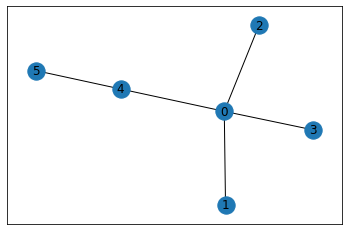

In [4]:
nx.draw_networkx(G)

In [8]:
G.debt

0

In [6]:
G.give(4)
G.give(4)
G.give(5)
G.give(5)
G.give(0)
G.give(0)
G.give(0)
G.give(1)
G.give(1)
G.give(1)
G.give(2)
G.give(2)
G.give(2)
G.give(4)

## Problem setup

### Environment
A graph (DGGraph object) representing a given game. The graph has nodes (with integer values assigned to them) and edges.\
The state is a dictionary {node: node[value] for each node in graph}. 

### Objective
Win the game by making debt (sum of all negative values) non-negative in as few moves as possible (avoid inverse actions; namely, both give and take actions on the same node)

### Action space
On each node, two actions can be taken: 'give' and 'take'.\
'Give' action increases value of the node's neighbors by 1 and subtracts len(neighbors) from its own value.
'Take' action does the complete opposite.\
Thus, $A = \left\{(\text{node},\;\text{give_or_take}): \text{node}\in\text{nodes}, \;\text{give_or_take}\in[\text{give}, \;\text{take}]\right\}$

### Reward function
IDK lol. Probably, something to do with debt (and/or the number of negative values)

## Random actions model

In [7]:
import pandas as pd
import json
import os

In [8]:
def get_list_of_game_files():
    return [el for el in os.listdir('games') if el.endswith('.json')]

In [19]:
def assemble_games_dataframe():
    # this dataframe will have columns: 
    # game_number, difficulty(genus?), number_of_plays, best_play, date_created
    import time
    data = {
        'game_number': [],
        'difficulty': [],
        'num_of_plays': [],
        'best_score': [],
        'date_created': []
    }
    filenames = get_list_of_game_files()
    for file in filenames:
        with open('games/' + file, 'r') as f:
            dat = json.load(f)
        
        data['game_number'].append(int(file[:-5]))
        data['difficulty'].append('none yet')
        data['num_of_plays'].append(len(dat['plays']))
        data['best_score'].append('none yet 2')
        data['date_created'].append(dat['info']['date_created'])
    df = pd.DataFrame(data)
    df = df.set_index('game_number')
    df.sort_values('num_of_plays', inplace=True)
    return df

In [20]:
df = assemble_games_dataframe()

In [21]:
df

,difficulty,num_of_plays,best_score,date_created
game_number,,,,
11,none yet,0,none yet 2,18/05/2022 13:06:11
14,none yet,0,none yet 2,18/05/2022 13:07:48
5,none yet,0,none yet 2,18/05/2022 12:04:39
8,none yet,0,none yet 2,18/05/2022 12:21:02
10,none yet,1,none yet 2,18/05/2022 13:03:32
12,none yet,1,none yet 2,18/05/2022 13:06:29
13,none yet,1,none yet 2,18/05/2022 13:06:56
9,none yet,1,none yet 2,18/05/2022 12:26:29
2,none yet,2,none yet 2,16/05/2022 21:03:05


In [23]:
df6 = df[:6]

In [24]:
df6

,difficulty,num_of_plays,best_score,date_created
game_number,,,,
11,none yet,0,none yet 2,18/05/2022 13:06:11
14,none yet,0,none yet 2,18/05/2022 13:07:48
5,none yet,0,none yet 2,18/05/2022 12:04:39
8,none yet,0,none yet 2,18/05/2022 12:21:02
10,none yet,1,none yet 2,18/05/2022 13:03:32
12,none yet,1,none yet 2,18/05/2022 13:06:29


In [36]:
for game_num, row in df6.iterrows():
    print(i, dict(row))

11 {'difficulty': 'none yet', 'num_of_plays': 0, 'best_score': 'none yet 2', 'date_created': '18/05/2022 13:06:11'}
14 {'difficulty': 'none yet', 'num_of_plays': 0, 'best_score': 'none yet 2', 'date_created': '18/05/2022 13:07:48'}
5 {'difficulty': 'none yet', 'num_of_plays': 0, 'best_score': 'none yet 2', 'date_created': '18/05/2022 12:04:39'}
8 {'difficulty': 'none yet', 'num_of_plays': 0, 'best_score': 'none yet 2', 'date_created': '18/05/2022 12:21:02'}
10 {'difficulty': 'none yet', 'num_of_plays': 1, 'best_score': 'none yet 2', 'date_created': '18/05/2022 13:03:32'}
12 {'difficulty': 'none yet', 'num_of_plays': 1, 'best_score': 'none yet 2', 'date_created': '18/05/2022 13:06:29'}
